In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/south-african-heart-disease-dataset/SAHeart.csv


In [2]:
data=pd.read_csv('/kaggle/input/south-african-heart-disease-dataset/SAHeart.csv')
data

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...,...
457,459,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,460,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,461,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,462,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   row.names  462 non-null    int64  
 1   sbp        462 non-null    int64  
 2   tobacco    462 non-null    float64
 3   ldl        462 non-null    float64
 4   adiposity  462 non-null    float64
 5   famhist    462 non-null    object 
 6   typea      462 non-null    int64  
 7   obesity    462 non-null    float64
 8   alcohol    462 non-null    float64
 9   age        462 non-null    int64  
 10  chd        462 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 39.8+ KB


In [4]:
data.duplicated().any()

False

In [5]:
data.describe()

,row.names,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,231.935065,138.326840,3.635649,4.740325,25.406732,53.103896,26.044113,17.044394,42.816017,0.346320
std,133.938585,20.496317,4.593024,2.070909,7.780699,9.817534,4.213680,24.481059,14.608956,0.476313
min,1.000000,101.000000,0.000000,0.980000,6.740000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,116.250000,124.000000,0.052500,3.282500,19.775000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,231.500000,134.000000,2.000000,4.340000,26.115000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,347.750000,148.000000,5.500000,5.790000,31.227500,60.000000,28.497500,23.892500,55.000000,1.000000
max,463.000000,218.000000,31.200000,15.330000,42.490000,78.000000,46.580000,147.190000,64.000000,1.000000


In [6]:
data.select_dtypes('object').describe()

,famhist
count,462
unique,2
top,Absent
freq,270


array([[<Axes: title={'center': 'row.names'}>,
        <Axes: title={'center': 'sbp'}>,
        <Axes: title={'center': 'tobacco'}>],
       [<Axes: title={'center': 'ldl'}>,
        <Axes: title={'center': 'adiposity'}>,
        <Axes: title={'center': 'typea'}>],
       [<Axes: title={'center': 'obesity'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'chd'}>, <Axes: >, <Axes: >]],
      dtype=object)

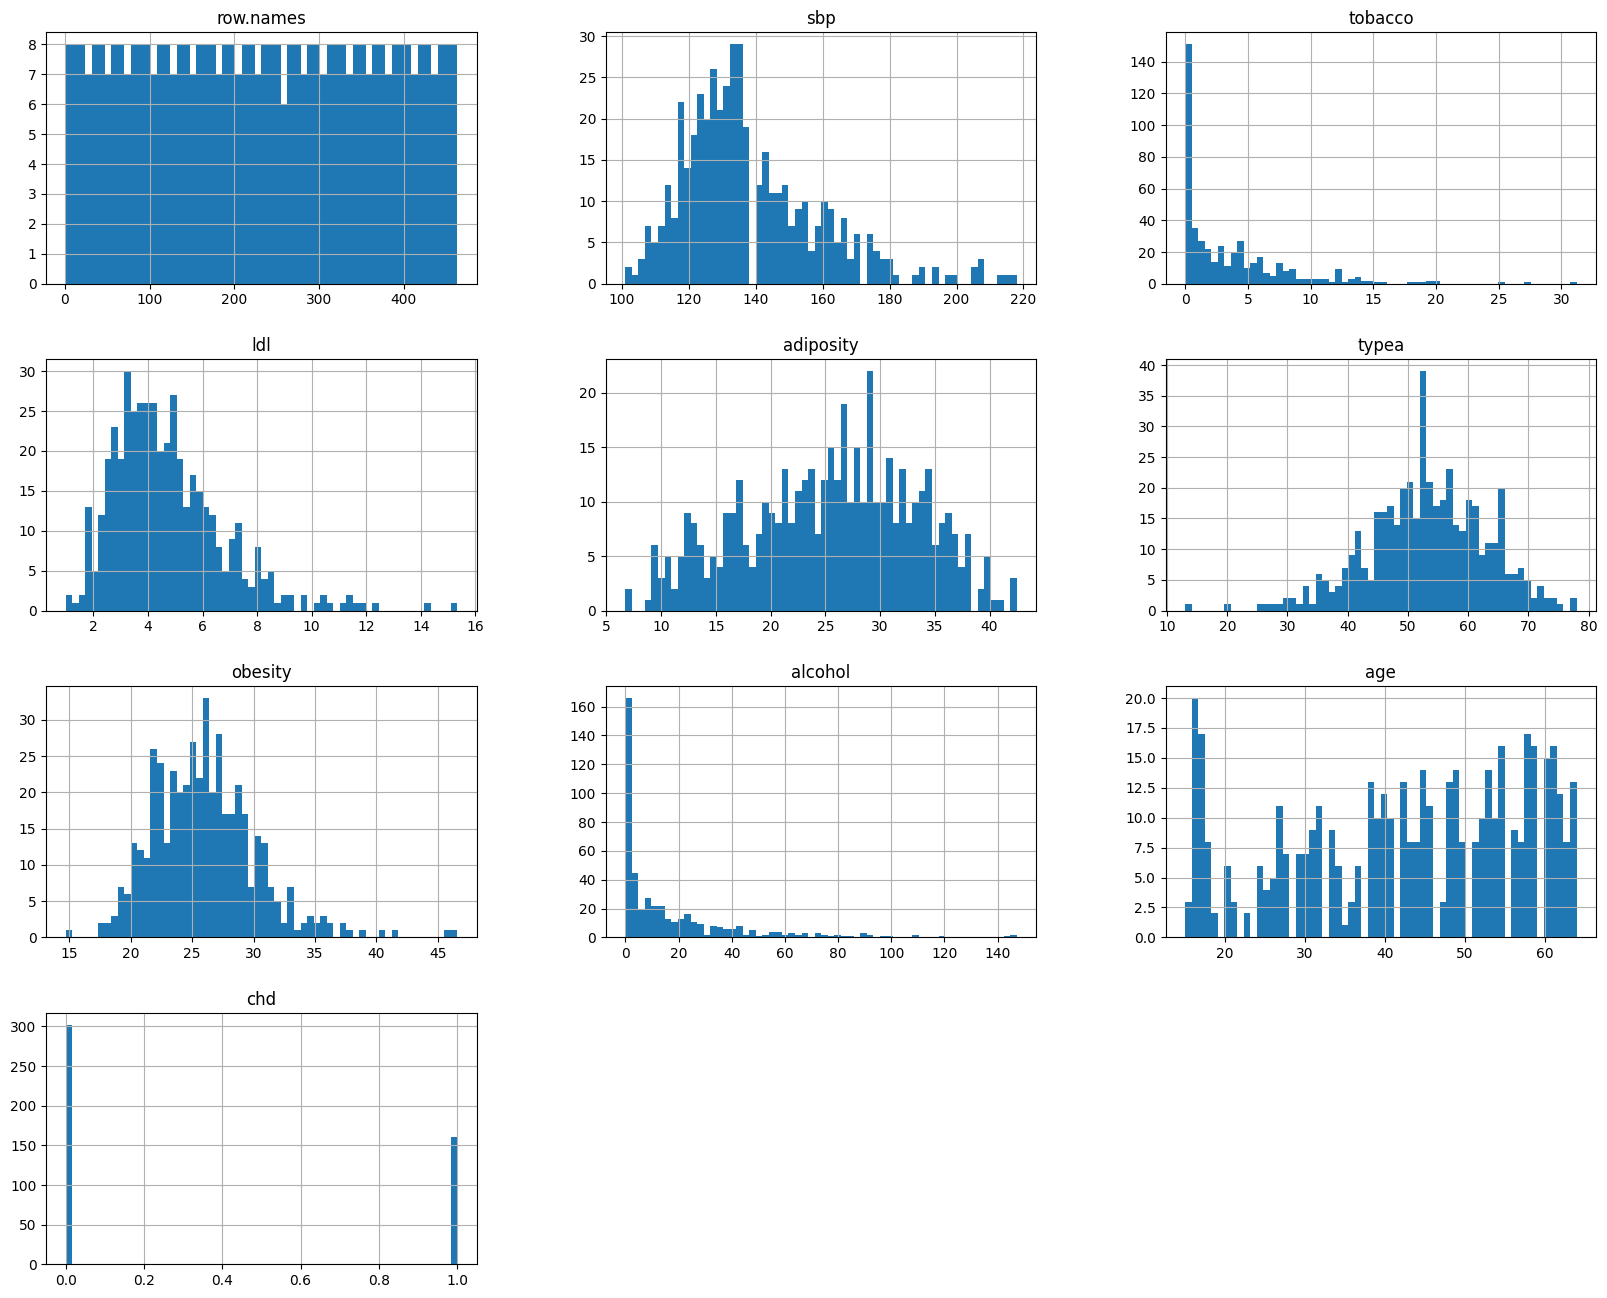

In [7]:
data.hist(bins=60,figsize=(20,16))

In [8]:
data.drop(columns='row.names',inplace=True)
data

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


In [9]:
data['famhist'] = data['famhist'].map({'Present': 1,'Absent': 0})

In [10]:
data

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,0,64,28.45,0.00,58,0
458,182,4.20,4.41,32.10,0,52,28.61,18.72,52,1
459,108,3.00,1.59,15.23,0,40,20.09,26.64,55,0
460,118,5.40,11.61,30.79,0,64,27.35,23.97,40,0


In [11]:
X=data.copy()
y=X.pop('chd')

In [12]:
X

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49
...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,0,64,28.45,0.00,58
458,182,4.20,4.41,32.10,0,52,28.61,18.72,52
459,108,3.00,1.59,15.23,0,40,20.09,26.64,55
460,118,5.40,11.61,30.79,0,64,27.35,23.97,40


In [13]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8)

In [14]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scale_columns = [col for col in X.columns if col!='famhist']
scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

X_train[scale_columns] = scaler.fit_transform(X_train[scale_columns])
X_test[scale_columns] = scaler.transform(X_test[scale_columns])

X_train[scale_columns] = min_max_scaler.fit_transform(X_train[scale_columns])
X_test[scale_columns] = min_max_scaler.transform(X_test[scale_columns])

Logistic Regression Model:

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,roc_auc_score,accuracy_score,precision_score,recall_score

LG_model = LogisticRegression(max_iter=300)
LG_model.fit(X_train,y_train)
y_pred = LG_model.predict(X_test)
print('accuracy score : ',accuracy_score(y_pred,y_test))
print('precision_score : ',precision_score(y_pred,y_test))
print('recall score : ',recall_score(y_pred,y_test))
print('f1_score : ',f1_score(y_pred,y_test))
print('roc_auc_score : ',roc_auc_score(y_pred,y_test))

accuracy score :  0.7634408602150538
precision_score :  0.45714285714285713
recall score :  0.8421052631578947
f1_score :  0.5925925925925926
roc_auc_score :  0.792674253200569


Random Forest Model:

In [16]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)
print('accuracy score : ',accuracy_score(y_pred,y_test))
print('precision_score : ',precision_score(y_pred,y_test))
print('recall score : ',recall_score(y_pred,y_test))
print('f1_score : ',f1_score(y_pred,y_test))
print('roc_auc_score : ',roc_auc_score(y_pred,y_test))

accuracy score :  0.6774193548387096
precision_score :  0.45714285714285713
recall score :  0.5925925925925926
f1_score :  0.5161290322580645
roc_auc_score :  0.6523569023569025


Xgboost Classifier Model:

In [17]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(X_train,y_train)
y_pred = xgb_model.predict(X_test)
print('accuracy score : ',accuracy_score(y_pred,y_test))
print('precision_score : ',precision_score(y_pred,y_test))
print('recall score : ',recall_score(y_pred,y_test))
print('f1_score : ',f1_score(y_pred,y_test))
print('roc_auc_score : ',roc_auc_score(y_pred,y_test))

accuracy score :  0.6666666666666666
precision_score :  0.42857142857142855
recall score :  0.5769230769230769
f1_score :  0.4918032786885245
roc_auc_score :  0.6392078071182549


Support Vector Classifier:

In [18]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train,y_train)
y_pred = svc_model.predict(X_test)
print('accuracy score : ',accuracy_score(y_pred,y_test))
print('precision_score : ',precision_score(y_pred,y_test))
print('recall score : ',recall_score(y_pred,y_test))
print('f1_score : ',f1_score(y_pred,y_test))
print('roc_auc_score : ',roc_auc_score(y_pred,y_test))

accuracy score :  0.7096774193548387
precision_score :  0.4
recall score :  0.7
f1_score :  0.509090909090909
roc_auc_score :  0.7061643835616438


Neural Network:

In [19]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(units=12, activation='relu',input_shape=[9]),
    layers.Dense(units=12,activation='relu'),
    layers.Dense(units=12,activation='relu'),
    layers.Dense(units=1,activation='sigmoid'),
])

2024-03-03 14:06:06.948822: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-03 14:06:06.948950: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-03 14:06:07.103754: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.compile(
    optimizer='adam',
    loss = 'binary_crossentropy',
    metrics = ['binary_accuracy'],
)

In [21]:
early_stopping = keras.callbacks.EarlyStopping(
    patience = 10,
    min_delta = 0.001,
    restore_best_weights = True,
)

In [22]:
history = model.fit(X_train,y_train,
                   validation_data = (X_test,y_test),
                   batch_size = 512,
                    epochs=1000,
                    callbacks = [early_stopping],
                    verbose=0,
                   )
history_df = pd.DataFrame(history.history)
print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))

Best Validation Loss: 0.4689
Best Validation Accuracy: 0.7957


<Axes: >

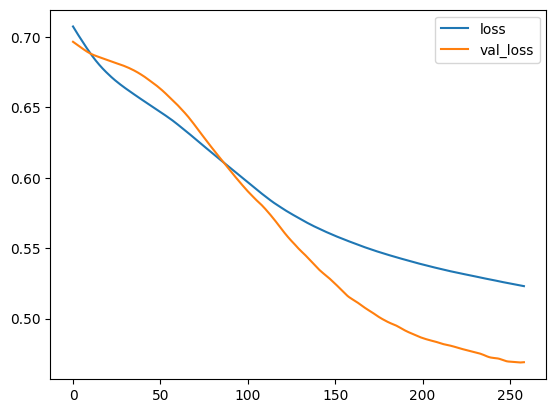

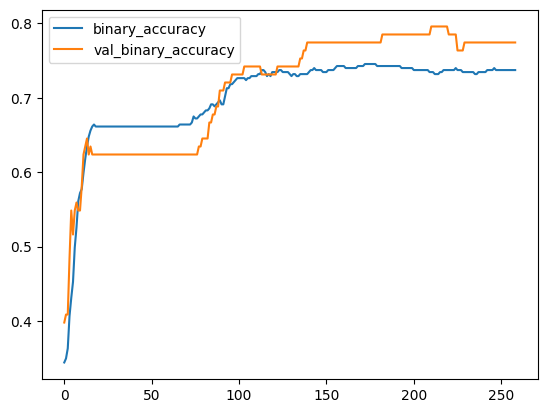

In [23]:
history_df.loc[:,['loss','val_loss']].plot()
history_df.loc[:,['binary_accuracy','val_binary_accuracy']].plot()